In [12]:
import numpy as np

import matplotlib.pyplot as plt

from IPython import display

# Task #5 Quasiclassic

In [13]:
def find_zero(func, x0, x1, step = 1e-3, eps = 1e-6):
    left = x0
    right = x0 + step
    while right + step < x1 and func(left) * func(right) > 0:
        left, right = right, right + step
    
    if func(left) * func(right) > 0:
        return None
    middle = (left + right) / 2
    while np.abs(func(middle)) > eps:
        if func(left) * func(middle) < 0:
            right = middle
        else:
            left = middle
        middle = (left + right) / 2
    return middle
        

def find_all_zeros(func_builder, x0, x1, step = 1e-3, eps = 1e-6, max_count = 5):
    res = []
    n = 1
    while True:
        zero = find_zero(func_builder(n), x0, x1, step, eps)
        if zero is None or n > max_count:
            break
        print('#%d zero found' % n)
        res.append(zero)
        n += 1
    return res

def integrate(func, x0, x1, h = 0.1):
    res = 0.0
    grid = np.arange(x0, x1, h)
    for i in range(len(grid) - 1):
        a = grid[i]
        b = grid[i+1]
        res += (b - a) / 6 * (func(a) + 4*func((a + b)/2) + func(b))
    return res

def action(gamma):
#     gamma = 21.7
    def _func(n):
        return lambda func, x0, x1, h: gamma * integrate(func, x0, x1, h) - np.pi * (n + 0.5)
    return _func

In [14]:
def lj_potential(x):
    return 4*(np.power(x, -12) - np.power(x, -6))

# En -> (x -> Double)
def impulse(En):
    return lambda x: np.sqrt(En - lj_potential(x))

def get_bounds(En):
    dx = np.sqrt(1+En)
    x0 = np.power(0.5*(1 + dx), -1/6) + 1e-5
    x1 = np.power(0.5*(1 - dx), -1/6)
    return x0, x1

In [15]:
h = 1e-3
E0 = -1 + h
E1 = 0
n = 12

def build_func(n):
    act = action(gamma_H2)(n)
    def _func(En):
        x0, x1 = get_bounds(En)
        return act(impulse(En), x0, x1, h)
    return _func

# print(find_zero(build_func(n), E0, E1, eps = 1e-3))
nmax = np.floor(build_func(0)(-h))
print('Levels count: ', nmax)

zeros = find_all_zeros(build_func, E0, E1, eps = 1e-2)

# levels:  23.0
#1 zero found
#2 zero found
#3 zero found
#4 zero found
#5 zero found


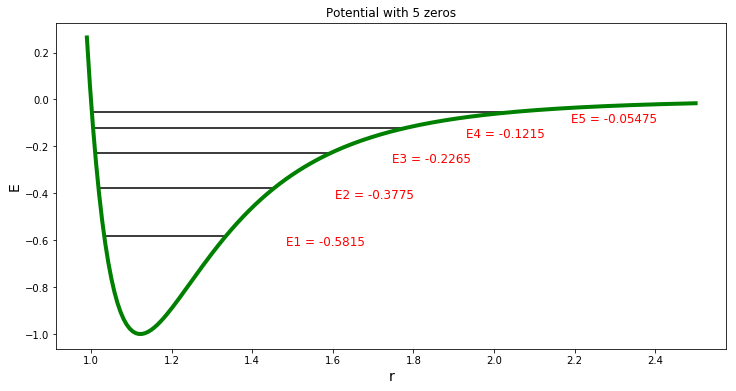

In [16]:
x = np.linspace(0.99, 2.5, 200)
y = lj_potential(x)
r0 = np.power(2, 1/6)

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='green', linewidth=4)

plt.title('Potential with {:d} zeros'.format(len(zeros)))

#plt.vlines(r0, -1, 0, colors='c', linestyle='--')
#plt.text(r0 + 0.01, 0.03, 'r0={:g}'.format(r0), fontsize=12, horizontalalignment='left')

for i, zero in enumerate(zeros):
    x0, x1 = get_bounds(zero)
    plt.hlines(zero, x0, x1)
    plt.text(x1 + 0.15, zero, 'E{:d} = {:g}'.format(i + 1, zero), color='red', fontsize=12, verticalalignment='top')
    
plt.xlabel('r', fontsize=14)
plt.ylabel('E', fontsize=14)

plt.show()

## Test

In [17]:
h = 1e-3
E0 = 0 + h
E1 = 10

def test_potential(x):
    return x**2 / 4

def test_impulse(En):
    def _func(x):
        return np.sqrt(En - test_potential(x))
    return _func

def get_test_bounds(En):
    abs_root = 2 * np.sqrt(En)
    return -abs_root + 1e-5, abs_root

def build_test_func(n):
    act = action(1)(n)
    def _func(En):
        x0, x1 = get_test_bounds(En)
        return act(test_impulse(En), x0, x1, h)
    return _func

# print(find_zero(build_func(n), E0, E1, eps = 1e-3))

zeros = []
for n in range(0, 6):
    zeros.append(find_zero(build_test_func(n), E0, E1, step=1e-1, eps = 1e-3))
    print(n)

zeros = np.array(zeros)

0
1
2
3
4
5


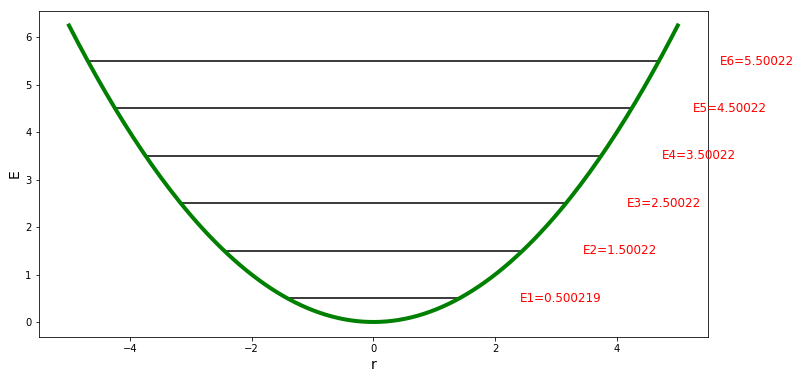

In [23]:
x = np.linspace(-5, 5, 200)
y = test_potential(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='green', linewidth=4)

for i, zero in enumerate(zeros):
    x0, x1 = get_test_bounds(zero)
    plt.hlines(zero, x0, x1)
    plt.text(x1 + 1.0, zero, 'E{:d}={:g}'.format(i + 1, zero), color='red', fontsize=12, verticalalignment='center')

# print(zeros[1:] - zeros[:-1])
plt.xlabel('r', fontsize=14)
plt.ylabel('E', fontsize=14)

plt.show()

In [6]:
m = 1.790476689362e-27# ??
a = 6.5926e-11 # m
V0 = 7.595e-19 # J
h_bar = 1.0545718e-34

gamma_H2 = np.sqrt(2 * m * a**2 * V0 / h_bar**2)
gamma_H2

32.60196635131638

In [19]:
gamma_H2 / np.pi

10.37752819865529